<div class="alert alert-block alert-warning">
<h1><center><b>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</b></h1></center>
<h1><center><b>Final Project</b></h1></center>
</div>

<div class="alert alert-block alert-info">
<b>Group_ID: 9<b>
<br></br>
<b>Group Members:</b>  

1. Dhruv B00891974
2. Mudra B00932103
3. Arihant B00917961
4. Abhinav Acharya B00929073
</div>


<div class="alert alert-block alert-warning">

<h1><center><b>1. Dataset Information </b></h1>

<div class="alert alert-block alert-info">
<b>Dataset Name:</b>  spotifydata.csv

<b>Link to the Dataset:</b> https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

<b>Dataset Description:</b> 
This Dataset analyzes the behavior between valence and all the measures that Spotify API gives so I got approximately 10,000 per genre. There are 26 genres so it is a total of 232,725 tracks. This dataset has key, mode, and time signature attributes that are cleaned. In total, it has 18 columns, out of which, we will use some of the most prominent features to predict the popularity of the song based on a threshold we are setting.
</div>


<div class="alert alert-block alert-warning">

<h1><center><b>2. Task Information</b></h1>


<div class="alert alert-block alert-info">
<b> Task Goal:</b>  Song Popularity 

<b> Task Description:</b> The goal is to find if a song is popular or not based on the dataset mentioned above. Popularity of songs is importanat to know if users would vibe at  a particular set of songs. This, in future would lead us to match them easily. We will be using almost all the features to predict the popularity as the features are all properties of a song and removing any one feature can significantly impact the classification. We have trained 6 models — Logistic Regression, Decision Trees, Random Forest, K Nearest Neighbours, Linear SVM, and Neural Networks. The usage of these models was not only to analyse the performance but also to take the complexity of those mode3ls from low to high. The selection of these models is to analyse the performance of each of those.
</div>

<div class="alert alert-block alert-warning">

<h1><center><b>3. Task Implementation: Coding</b></h1>

<div class="alert alert-block alert-warning">

<h3><center><b>Song Popularity</b></h3>

<div class="alert alert-block alert-info">
Importing Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


<div class="alert alert-block alert-info">

<h5><b>3.1 EDA</b></h5>

</div>

<div class="alert alert-block alert-info">
Loading the dataset</div>

In [2]:
song_path = r'spotifydata.csv'
song_data = pd.read_csv(song_path)

In [3]:
print("EDA:")
print('\nSong Data:')
display(song_data.head())
print("Length of song dataset:", len(song_data))
display(song_data.describe())
display(song_data.isna().sum())
display(pd.DataFrame({'Column': song_data.columns, 'DType': [song_data[col].dtype for col in song_data.columns], 'NUniques': [song_data[col].nunique() for col in song_data.columns]}))

EDA:

Song Data:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Length of song dataset: 232725


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

,Column,DType,NUniques
0,genre,object,27
1,artist_name,object,14564
2,track_name,object,148614
3,track_id,object,176774
4,popularity,int64,101
5,acousticness,float64,4734
6,danceability,float64,1295
7,duration_ms,int64,70749
8,energy,float64,2517
9,instrumentalness,float64,5400




<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

<div class="alert alert-block alert-info">

<h5><b>3.2 Pre-processing</b></h5>

</div>

In [4]:
#  Retrieve the keys present in the song_data dictionary
song_data.keys()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

<div class="alert alert-block alert-info">
Checking Missing Values</div>

In [5]:
song_data.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

<div class="alert alert-block alert-info">
Data Visualization</div>



C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\3871686646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_data['popularity']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'Popularity Distribution')

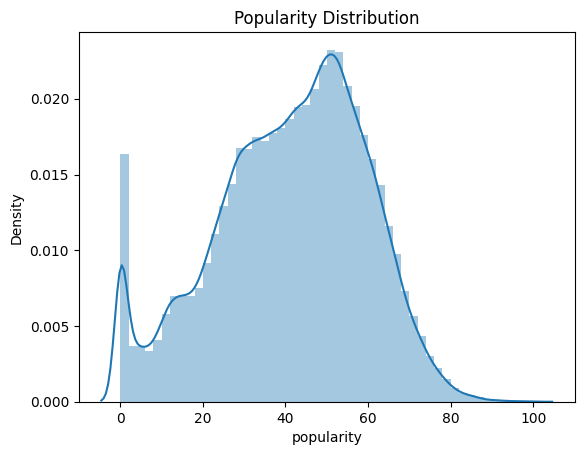

In [6]:
sns.distplot(song_data['popularity']).set_title('Popularity Distribution')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is to plot the distribution plot (distplot) for the 'popularity' column. Using this, we are visualizing the distribution of popularity scores among the songs.
</div>

Visualizing Correlation Among Song Data Features Using Heatmap

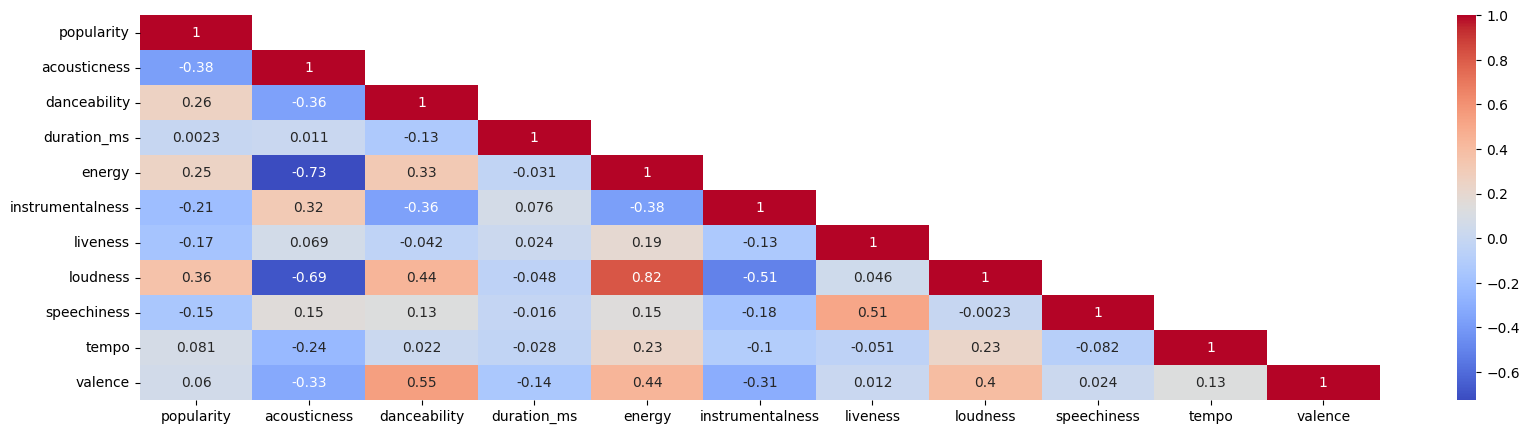

In [7]:
correlation = song_data.corr(numeric_only=True)
fig = plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)
sns.heatmap(correlation, annot=True, cmap="coolwarm", mask=mask)
plt.show()

Visualization of Popularity Based on Time Signature

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\2406838631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'time_signature', y = 'popularity', data = song_data, palette='coolwarm')


Text(0.5, 1.0, 'Popularity Based on Time Signature')

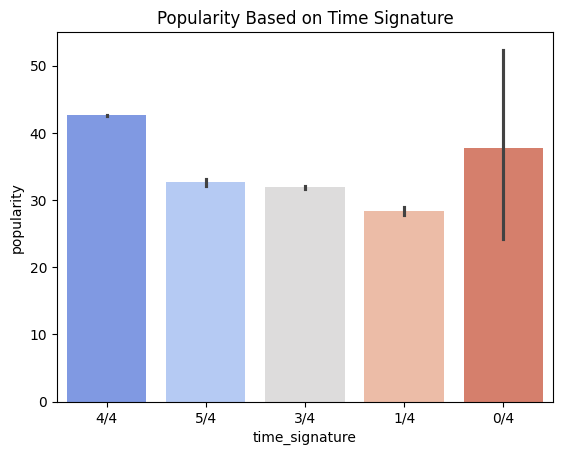

In [8]:
sns.barplot(x = 'time_signature', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Time Signature')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to showcase the relationship between the time signature of songs and their respective popularity levels
</div>

Popularity Distribution Across Different Musical Keys

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\2471265564.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'key', y = 'popularity', data = song_data, palette='coolwarm')


Text(0.5, 1.0, 'Popularity Based on Key')

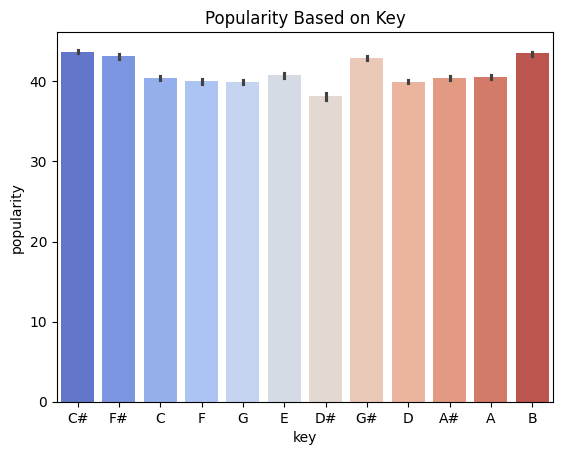

In [9]:
sns.barplot(x = 'key', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Key')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to show how popularity varies across different musical keys, mainly to understand relationships between key and music popularity.
</div>

Popularity Based on Musical Mode

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\2488031142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'mode', y = 'popularity', data = song_data, palette='coolwarm')


Text(0.5, 1.0, 'Popularity Based on Mode')

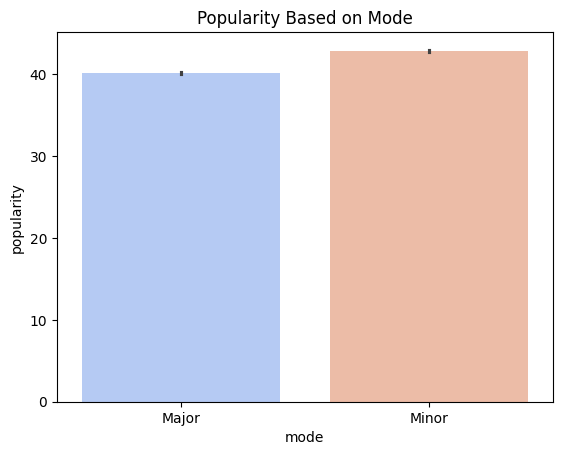

In [10]:
sns.barplot(x = 'mode', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Mode')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to show the relationship between musical mode and song popularity
</div>

Distribution of Acousticness in Songs with Popularity Above 70

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\1018885752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_songs['acousticness'])


Text(0.5, 1.0, 'Acoustiness for Songs with More than 70 Popularity')

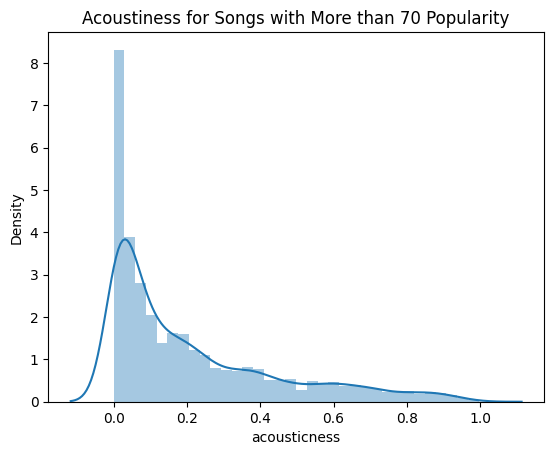

In [11]:
popular_songs = song_data[song_data.popularity > 70]
sns.distplot(popular_songs['acousticness'])
plt.title('Acoustiness for Songs with More than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code filters songs with a popularity score above 70 from the dataset and visualization is performed specifically for acousticness
</div>

Distribution of Acousticness in Songs with Popularity Below 70

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\228728011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs['acousticness'])


Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

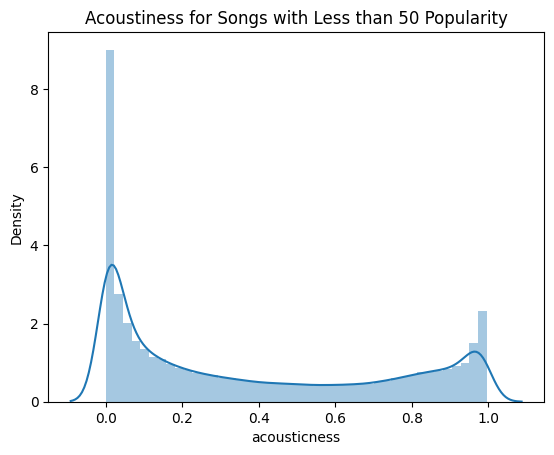

In [12]:
unpopular_songs = song_data[song_data.popularity < 70]
sns.distplot(unpopular_songs['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code filters songs with a popularity score below 70 from the dataset and visualization is performed specifically for acousticness
</div>

Distribution of Loudness for Highly Popular Songs

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\1995242145.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_songs['loudness'])


Text(0.5, 1.0, 'Loudness for Songs with More than 70 Popularity')

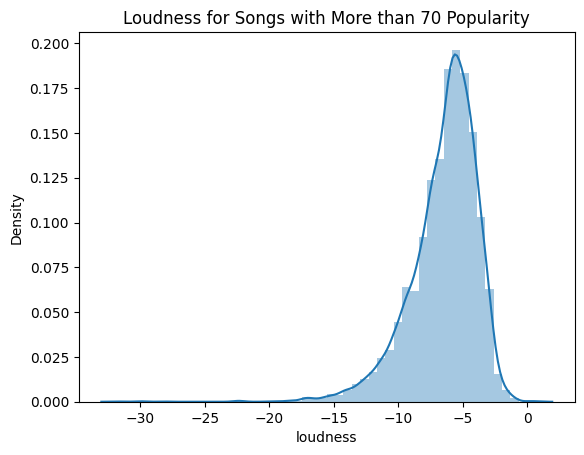

In [13]:
sns.distplot(popular_songs['loudness'])
plt.title('Loudness for Songs with More than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Visualizing the distribution of loudness for songs with a popularity above 70, giving information about the loudness patterns within the list of highly popular songs.
</div>

Distribution of Loudness for Less Popular Songs

C:\Users\rockm\AppData\Local\Temp\ipykernel_10852\1000170378.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs['loudness'])


Text(0.5, 1.0, 'Loudness for Songs with Less than 70 Popularity')

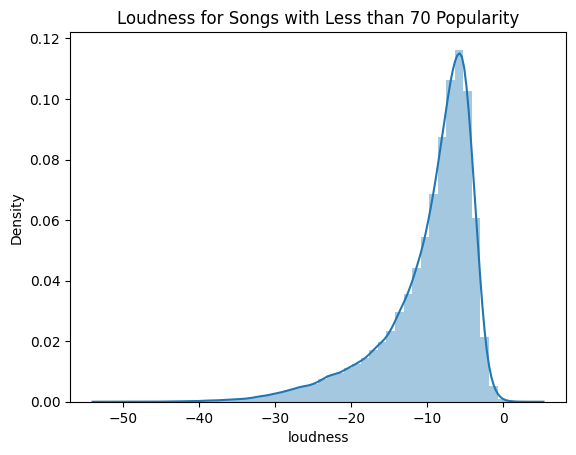

In [14]:
unpopular_songs = song_data[song_data.popularity < 70]
sns.distplot(unpopular_songs['loudness'])
plt.title('Loudness for Songs with Less than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Visualizing the distribution of loudness for songs with a popularity below 70, giving information about the loudness patterns within the list of less popular songs.
</div>

<div class="alert alert-block alert-info">
<b>Data Preparation</b> </div>



Encoding Categorical Keys in Song Data

In [15]:
unique_keys = song_data['key'].unique()
for i in range(len(unique_keys)):
    song_data.loc[song_data['key'] == unique_keys[i], 'key'] = i
song_data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
125168,Classical,Erik Satie,Satie: 3 Gymnopédies: No. 1 in D Major and D M...,7EmWxGbLI9kq4SCl8gokfb,39,0.9910,0.588,189027,0.025,0.881000,4,0.101,-27.829,Major,0.0837,81.057,3/4,0.598
29816,Anime,いとうかなこ,COSMIC LOOPER,29VQXR7cujVrFGL2aGMCC4,29,0.0377,0.541,327973,0.989,0.000000,5,0.356,-4.606,Minor,0.1120,148.003,4/4,0.444
224072,Rock,Bryce Fox,Stomp Me Out,7qXTeIDkqZIexgdCXrxIrB,60,0.0100,0.296,228387,0.738,0.000125,9,0.063,-5.384,Major,0.1180,75.019,4/4,0.303
155009,Rock,David Bowie,Rock 'N' Roll Suicide - 2012 Remastered Version,1k5iH4KDKi56MFvlnrALNV,57,0.3090,0.457,178266,0.308,0.000002,2,0.107,-11.474,Major,0.0398,103.111,3/4,0.272
204643,Soundtrack,Thomas Newman,All Drains Lead To The Ocean,2JWfLVF2Hrih8xYKrsYoEc,24,0.7020,0.532,96400,0.161,0.759000,3,0.379,-20.727,Major,0.0365,152.185,3/4,0.292


Mapping Time Signatures to Numerical Categories in Song Data

In [16]:
time_sign = song_data['time_signature'].unique()
for i in range(len(time_sign)):
    song_data.loc[song_data['time_signature'] == time_sign[i], 'time_signature'] = i
song_data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
181100,Jazz,Louis Armstrong,Ain't Misbehavin',7vcsthwGswnftGiVd3zmm2,32,0.98800,0.692,201493,0.133,0.0141,4,0.617,-15.071,Major,0.1470,121.866,0,0.445
89630,Hip-Hop,Gorillaz,Broken,3THFKx88trZuOFlssVLJ5G,57,0.00452,0.493,197053,0.918,0.0858,2,0.427,-4.618,Major,0.0340,158.897,0,0.703
231711,Soul,Jaheim,Never,0mRwNBO4xlQGW6SSGXPHBV,40,0.22400,0.537,266320,0.337,0.0000,5,0.107,-8.117,Major,0.0728,105.367,0,0.605
50332,Blues,Wendell B,When It Don't Make Sense,1PnBq9V6yvfFMElFoGTKd8,25,0.77600,0.507,397559,0.320,0.0000,4,0.107,-9.842,Major,0.0586,95.623,0,0.251
181727,Jazz,Thievery Corporation,The Numbers Game,0mhl6qapc7XSeNBQpOHaJG,36,0.08560,0.764,183867,0.870,0.9440,8,0.101,-5.505,Major,0.0544,103.989,0,0.597


Converting Musical Modes to Numerical Representation



In [17]:
song_data.loc[song_data["mode"] == 'Major', "mode"] = 1
song_data.loc[song_data["mode"] == 'Minor', "mode"] = 0
song_data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
193874,Movie,Dick Van Dyke,Chim Chim Cher-ee,0IKYsgkoaylTKGzrlfrpu7,32,0.843,0.372,166600,0.222,0.000000,3,0.104,-17.325,0,0.1120,69.810,0,0.392
28903,Anime,Shiro Sagisu,EVA-02,1j4ewjVn06IgpL4anY5jE0,26,0.336,0.463,120400,0.592,0.938000,3,0.144,-9.529,1,0.0408,107.897,0,0.332
134524,Reggae,Michael Franti & Spearhead,Love Don't Wait,58C042fQ2LWH6lOFjfJ28Y,27,0.209,0.734,220333,0.963,0.000007,4,0.106,-4.060,1,0.1280,113.972,0,0.871
86502,R&B,Wale,The Pessimist (feat. J. Cole),3b3SSIcnE9a77XoUEtG5Jm,44,0.422,0.639,272436,0.664,0.000000,11,0.230,-7.106,0,0.0451,107.996,0,0.193
72703,Children's Music,The Okee Dokee Brothers,Sister Moon and Brother Sun,4g3baASiZtpEdT2N0thPVb,5,0.812,0.658,238172,0.325,0.000014,2,0.555,-11.103,1,0.0310,91.971,0,0.369


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Transforming categorical labels 'Major' and 'Minor' to numerical representations '1' and '0' respectively.
</div>



Binary Classification of Song Popularity

In [18]:
song_data.loc[song_data['popularity'] < 70, 'popularity'] = 0 
song_data.loc[song_data['popularity'] >= 70, 'popularity'] = 1
song_data.loc[song_data['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
145,R&B,Mariah Carey,Hero,4FCb4CUbFCMNRkI6lYc1zI,1,0.7350,0.501,257733,0.378,0.000000,5,0.1190,-9.370,1,0.0290,119.987,0,0.178
147,R&B,Jason Derulo,Tip Toe (feat. French Montana),2z4pcBLQXF2BXKFvd0BuB6,1,0.0233,0.845,187521,0.709,0.000000,9,0.0940,-4.547,0,0.0714,98.062,0,0.620
160,R&B,Jennifer Lopez,Dinero,22mQXNE0nCuWq4yOwcadIn,1,0.4100,0.721,213750,0.881,0.000008,7,0.2920,-2.528,1,0.3420,127.759,0,0.643
161,R&B,Rihanna,Hate That I Love You,7iu0WYLdo4yksKf3seaxzI,1,0.3230,0.637,218947,0.730,0.000000,3,0.0981,-5.380,0,0.0874,93.867,0,0.732
174,R&B,Usher,OMG (feat. will.i.am),1bM50INir8voAkVoKuvEUI,1,0.1980,0.781,269493,0.745,0.000011,5,0.3600,-5.810,0,0.0332,129.998,0,0.326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226102,Rock,Bacilos,Caraluna,4XTMj7kd8DHLl0r7ghmEAr,1,0.1760,0.760,266160,0.773,0.000000,10,0.1000,-5.314,1,0.0675,102.789,0,0.895
226281,Rock,Alejandro Sanz,Corazón partío,0wQCKR9OFjYu5Kzrk7WivJ,1,0.1990,0.648,343413,0.846,0.000004,2,0.0803,-6.731,1,0.0424,160.075,0,0.815
226307,Rock,Elefante,Así Es La Vida,3ge3q3Hz0KWhQX5EAQcwEy,1,0.1310,0.804,309480,0.670,0.000000,4,0.1480,-8.142,0,0.0897,97.969,0,0.644
226413,Rock,Roxette,"It Must Have Been Love - From the ""Pretty Woma...",6qB7YcFpeBEQa0D6QO482y,1,0.3400,0.520,258787,0.652,0.000055,3,0.2560,-6.655,1,0.0274,80.609,0,0.722


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Transforming 'popularity' column into a binary classification by setting unpopular songs (below 70) to 0 and popular songs (above 70) to 1. The final line includes only songs marked as highly popular (assigned a value of 1).
- It is our threshold that we consider only songs above 70 as popular songs and those below 70 as unpopular songs
</div>

<div class="alert alert-block alert-info">

<h5><b>3.3 Model Development and Training</b></h5>

</div>


<div class="alert alert-block alert-info">

Feature Selection

In [19]:
song_features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]



<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.
</div>


In [20]:
training = song_data.sample(frac = 0.8,random_state = 420)
X_train = training[song_features]
y_train = training['popularity']
X_test = song_data.drop(training.index)[song_features]

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

#### <div class="alert alert-block alert-danger"> <b>Model 1: </b> Logistic Regression </div>

In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_valid)
lr_accuracy = accuracy_score(y_valid, lr_y_pred)
print("Accuracy: " + str(lr_accuracy))

lr_auc = roc_auc_score(y_valid, lr_y_pred) 
print("AUC: " + str(lr_auc))

Accuracy: 0.9600655279836717
AUC: 0.5


#### <div class="alert alert-block alert-danger"> <b>Model 2: </b> Decision Tree Classifier </div>

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_valid)
dt_accuracy = accuracy_score(y_valid, dt_y_pred)
print("Accuracy: " + str(dt_accuracy))

dt_auc = roc_auc_score(y_valid, dt_y_pred) 
print("AUC: " + str(dt_auc))

Accuracy: 0.9673702868192072
AUC: 0.8437897341591639


#### <div class="alert alert-block alert-danger"> <b>Model 3: </b> Random Forest Classifier </div>

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_y_pred)
print("Accuracy: " + str(rf_accuracy))

rf_auc = roc_auc_score(y_valid, rf_y_pred) 
print("AUC: " + str(rf_auc))

Accuracy: 0.98611558706628
AUC: 0.8422731074460856


#### <div class="alert alert-block alert-danger"> <b>Model 4: </b> K-Nearest Neighbors Classifier </div>

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_valid)
knn_accuracy = accuracy_score(y_valid, knn_y_pred)
print("Accuracy: " + str(knn_accuracy))

knn_auc = roc_auc_score(y_valid, knn_y_pred) 
print("AUC: " + str(knn_auc))

Accuracy: 0.9545063916639811
AUC: 0.5699358166028053


#### <div class="alert alert-block alert-danger"> <b>Model 5: </b> SVM with Linear Kernel </div>

Since linear SVM is O(n^3), and the training dataset is large, it would take a lot of operations to train the model. Therefore we will only use 10000 datapoints total.

In [27]:
svm_train = training.sample(10000)
svm_X_train = svm_train[song_features]
svm_y_train = svm_train['popularity']
svm_X_test = song_data.drop(svm_train.index)[song_features]
svm_X_train, X_valid_LSVC, svm_y_train, svm_y_valid = train_test_split(svm_X_train, svm_y_train, test_size = 0.2, random_state = 420)

In [28]:
svm_model = DecisionTreeClassifier()
svm_model.fit(svm_X_train, svm_y_train)
svm_y_pred = svm_model.predict(X_valid_LSVC)
svm_accuracy = accuracy_score(svm_y_valid, svm_y_pred)
print("Accuracy: " + str(svm_accuracy))

svm_auc = roc_auc_score(svm_y_valid, svm_y_pred) 
print("AUC: " + str(svm_auc))

Accuracy: 0.931
AUC: 0.5519684290604792



#### <div class="alert alert-block alert-danger"> <b>Model 6: </b> Feedforward Neural Network </div>

In [29]:
nn_model = Sequential()

nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

eval_metrics = nn_model.evaluate(X_valid, y_valid)
print(f"Accuracy: {eval_metrics[1]}")

nn_y_pred = nn_model.predict(X_valid)

nn_auc = roc_auc_score(y_valid, nn_y_pred)
print(f"AUC: {nn_auc}")



Epoch 1/10


4655/4655 [==============================] - 13s 2ms/step - loss: 0.1494 - accuracy: 0.9614 - val_loss: 0.1499 - val_accuracy: 0.9601
Epoch 2/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1452 - accuracy: 0.9615 - val_loss: 0.1496 - val_accuracy: 0.9601
Epoch 3/10
4655/4655 [==============================] - 13s 3ms/step - loss: 0.1444 - accuracy: 0.9615 - val_loss: 0.1498 - val_accuracy: 0.9601
Epoch 4/10
4655/4655 [==============================] - 12s 3ms/step - loss: 0.1437 - accuracy: 0.9615 - val_loss: 0.1490 - val_accuracy: 0.9601
Epoch 5/10
4655/4655 [==============================] - 12s 3ms/step - loss: 0.1431 - accuracy: 0.9615 - val_loss: 0.1486 - val_accuracy: 0.9601
Epoch 6/10
4655/4655 [==============================] - 13s 3ms/step - loss: 0.1423 - accuracy: 0.9615 - val_loss: 0.1480 - val_accuracy: 0.9601
Epoch 7/10
4655/4655 [==============================] - 14s 3ms/step - loss: 0.1418 - accuracy: 0.9616 - val_loss: 0.1480 - va

<div class="alert alert-block alert-info">

<h5><b>3.4 Model Evaluation</b></h5>

</div>


#### <div class="alert alert-block alert-danger"> <b>Model 1: </b> Logistic Regression</div>

Confusion Matrix:
[[35749     0]
 [ 1487     0]]
Accuracy: 0.96
Precision: 0.92
Recall: 0.96
F-measure: 0.94
Specificity: 1.00


C:\Users\rockm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


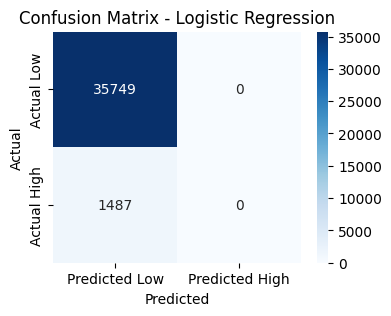

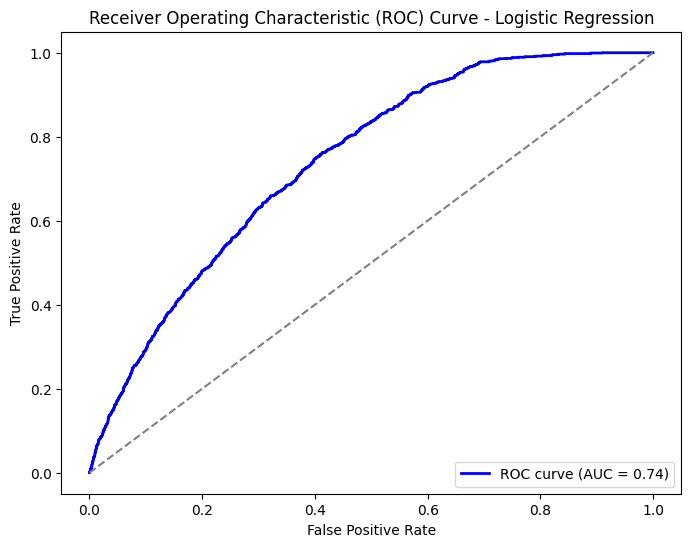

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_valid, lr_y_pred)
conf_matrix = confusion_matrix(y_valid, lr_y_pred)
precision = precision_score(y_valid, lr_y_pred, average='weighted')
recall = recall_score(y_valid, lr_y_pred, average='weighted')
f1 = f1_score(y_valid, lr_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

lr_y_pred_proba = lr_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, lr_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 2: </b> Decision Tree Classifier</div>

Confusion Matrix:
[[34966   783]
 [  432  1055]]
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F-measure: 0.97
Specificity: 0.98


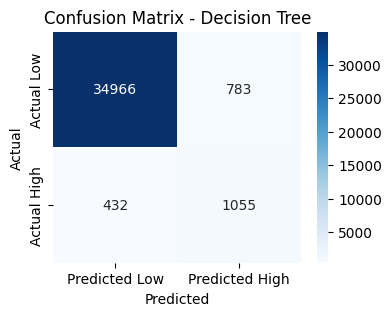

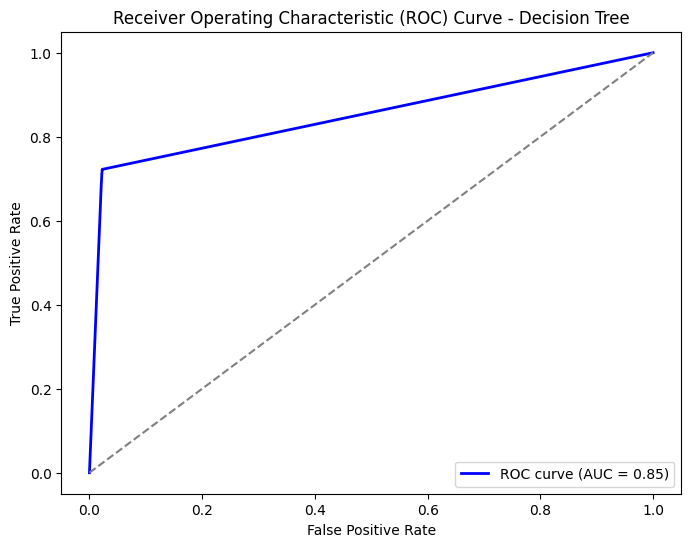

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_valid, dt_y_pred)
conf_matrix = confusion_matrix(y_valid, dt_y_pred)
precision = precision_score(y_valid, dt_y_pred, average='weighted')
recall = recall_score(y_valid, dt_y_pred, average='weighted')
f1 = f1_score(y_valid, dt_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_y_pred_proba = dt_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, dt_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 3: </b> Random Forest Classifier</div>

Confusion Matrix:
[[35699    50]
 [  467  1020]]
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F-measure: 0.99
Specificity: 1.00


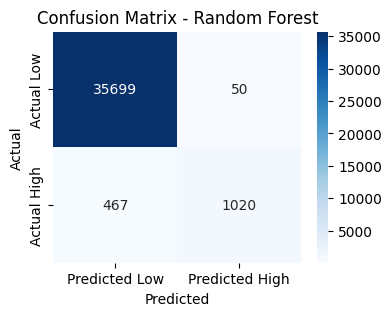

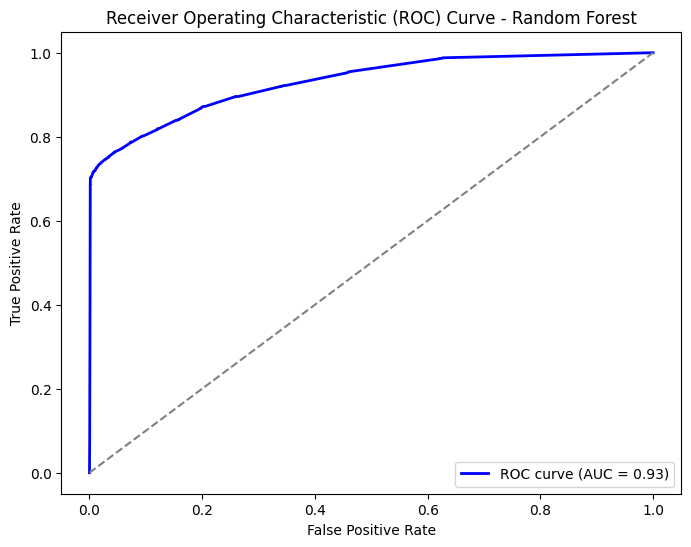

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_valid, rf_y_pred)
conf_matrix = confusion_matrix(y_valid, rf_y_pred)
precision = precision_score(y_valid, rf_y_pred, average='weighted')
recall = recall_score(y_valid, rf_y_pred, average='weighted')
f1 = f1_score(y_valid, rf_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_y_pred_proba = rf_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, rf_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()



#### <div class="alert alert-block alert-danger"> <b>Model 4: </b> K Nearest Neighbour</div>

Confusion Matrix:
[[35316   433]
 [ 1261   226]]
Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F-measure: 0.95
Specificity: 0.99


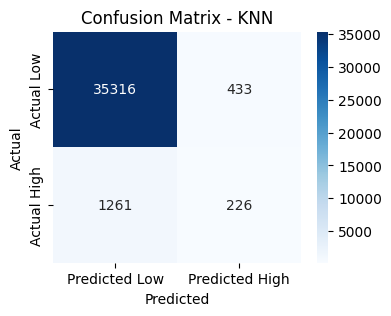

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_valid, knn_y_pred)
conf_matrix = confusion_matrix(y_valid, knn_y_pred)
precision = precision_score(y_valid, knn_y_pred, average='weighted')
recall = recall_score(y_valid, knn_y_pred, average='weighted')
f1 = f1_score(y_valid, knn_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

knn_y_pred_proba = knn_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, knn_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 5: </b> Linear Support Vector Machines</div>

Confusion Matrix:
[[1845   83]
 [  54   18]]
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F-measure: 0.94
Specificity: 0.96


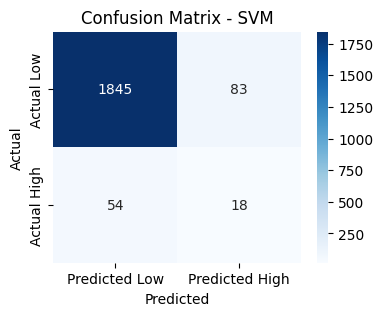

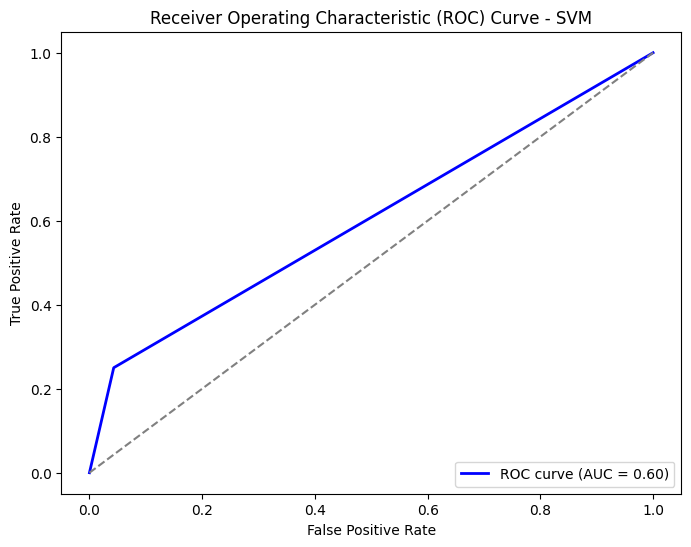

In [ ]:
accuracy = accuracy_score(svm_y_valid, svm_y_pred)
conf_matrix = confusion_matrix(svm_y_valid, svm_y_pred)
precision = precision_score(svm_y_valid, svm_y_pred, average='weighted')
recall = recall_score(svm_y_valid, svm_y_pred, average='weighted')
f1 = f1_score(svm_y_valid, svm_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

svm_y_pred_proba = svm_model.predict_proba(X_valid_LSVC)[:, 1]

fpr, tpr, thresholds = roc_curve(svm_y_valid, svm_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.show()

#### <div class="alert alert-block alert-danger"> <b>Model 6: </b> Feedforward Neural Network</div>

   1/1164 [..............................] - ETA: 1:07

1164/1164 [==============================] - 2s 2ms/step


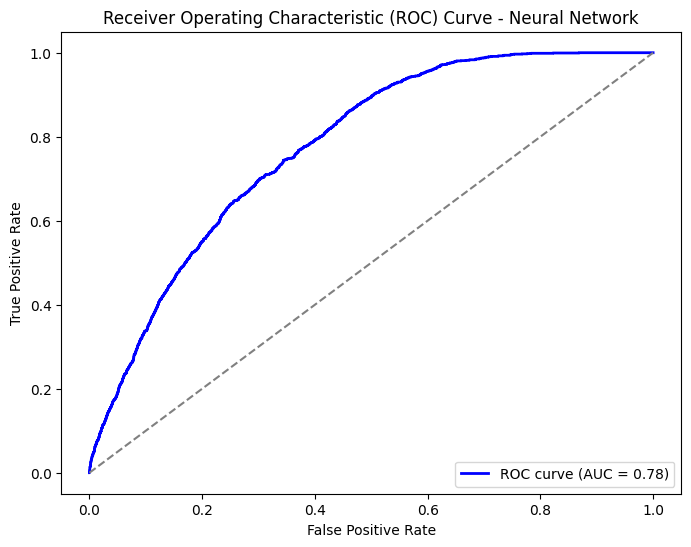

In [ ]:
nn_y_pred_proba = nn_model.predict(X_valid)

fpr, tpr, thresholds = roc_curve(y_valid, nn_y_pred_proba)
nn_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

<div class="alert alert-block alert-info">

<h5><b>3.5 Analysis</b></h5>

</div>


In [ ]:
model_performance_accuracy = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
    'Accuracy': [lr_accuracy, rf_accuracy, knn_accuracy, dt_accuracy, svm_accuracy]
})

model_performance_AUC = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
    'AUC': [lr_auc, rf_auc, knn_auc, dt_auc, svm_auc]
})


In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.986089
3,DecisionTreeClassifier,0.967746
0,LogisticRegression,0.960066
2,KNeighborsClassifier,0.954506
4,LinearSVC,0.931500


In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
3,DecisionTreeClassifier,0.843019
1,RandomForestClassifier,0.842259
4,LinearSVC,0.603475
2,KNeighborsClassifier,0.569936
0,LogisticRegression,0.500000


<div class="alert alert-block alert-success">
<b>Results</b> 

- We looked at data from songs on Spotify. We used details like the music's key, mood, and dance style to guess how popular a song might be (if it's rated higher than 70 out of 100) and didn't rely on things like the artist's name, music type, or when the song was released.

- The best method we used was the Random Forest Classifier. It guessed accurately about 98 out of 100 times and scored about 84 out of 100 when measuring its performance. The next best method was the Decision Tree Classifier. It got it right about 96 out of 100 times and scored around 84 out of 100 in its performance.

</div>



<div class="alert alert-block alert-info">
<b>References:</b>

1. Halilovic, I. (2021, July 30). Markdown for Jupyter notebooks cheatsheet - Inge Halilovic - Medium. Medium. https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
2. Scribbr. (2021, July 30). Free APA citation Generator | with Chrome Extension - Scribbr. https://www.scribbr.com/citation/generator/apa/
3. Zach. (2023). How to create a distribution plot in Matplotlib. Statology. https://www.statology.org/matplotlib-distribution-plot/
4. seaborn.displot — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.displot.html
5. Lau, C. H. (2021, December 7). 5 steps of a Data Science Project Lifecycle - towards Data Science. Medium. https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
6. Are hit songs becoming less musically diverse? (n.d.). The Pudding. https://pudding.cool/2018/05/similarity/
7. Nasreldin, M. (2018, July 2). Song Popularity Predictor - towards Data science. Medium. https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
8. Seaborn.Heatmap — seaborn 0.13.0 documentation. (n.d.). Pydata.org. Retrieved October 3, 2023. https://seaborn.pydata.org/generated/seaborn.heatmap.html
9. IBM documentation. (2021, April 8). Ibm.com. https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooksmarkdown-jupyter-cheatsheet
10. Spotify Tracks DB. (2019, July 23). Kaggle. https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv
</div>